In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df.rename(columns={'Country or Area': 'Country'}, inplace=True)
gdp_df.rename(columns={'Value': 'GDP_Per_Capita'}, inplace=True)
gdp_df = gdp_df[['Country', 'Year', 'GDP_Per_Capita']]
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [7]:
year_info = gdp_df[["Year","Country"]]
year_info = year_info.groupby("Country").count()
all_years = year_info[year_info["Year"]==31].count()
print(all_years)

Year    205
dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
 - Notice most countries have low GDP_per_capita, below 20000. The histogram, and density are good visulas for comparing amount of countries with x amount of GDP to others with x amount. The box and violin make comparing different levels of GDP diffucult.

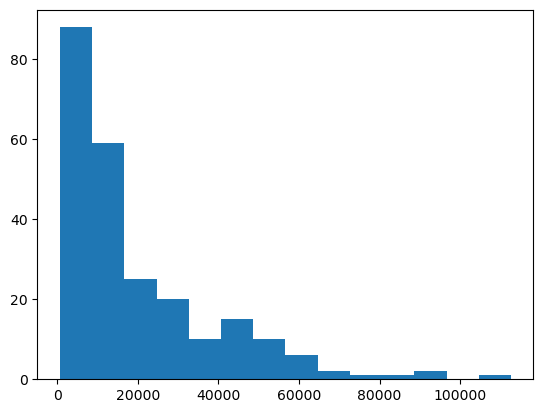

In [8]:
#Histplot using matplot
gdp_plotting = gdp_df[gdp_df["Year"] == 2020]


plt.hist(gdp_plotting['GDP_Per_Capita'], bins=14)

plt.show()


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

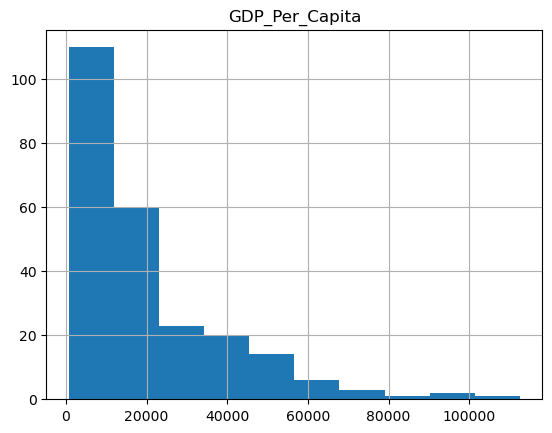

In [9]:
#histplot using pandas
gdp_plotting.hist('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

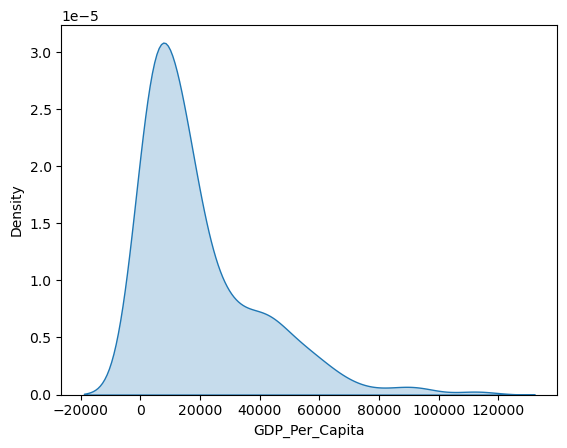

In [10]:
#densityplot using seaborn
sns.kdeplot(gdp_plotting['GDP_Per_Capita'], fill = 'blue')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

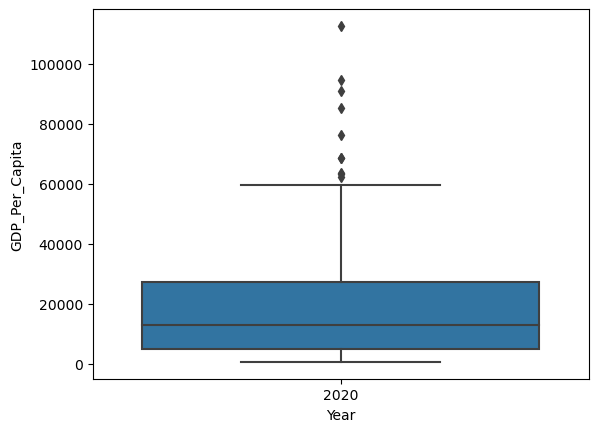

In [11]:
#Boxplot using seaborn
sns.boxplot( x=gdp_plotting["Year"], y=gdp_plotting["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

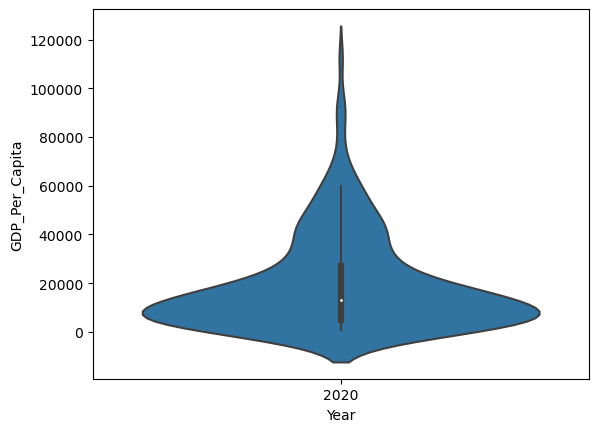

In [12]:
#Violin plot using
sns.violinplot(x=gdp_plotting["Year"], y=gdp_plotting["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [13]:
gdp_plotting.median()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_7948\179863449.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_plotting.median()


Year               2020.000000
GDP_Per_Capita    12908.937406
dtype: float64

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

-GDP values have risen over time as seen in the box and bar charts. Barplot is mess looking but can still give you quick glance, rise in GDP over time. Bar plot is mmost effective at comparing years. Scatter plot is not helpful for showing this comparision.


In [14]:
gdp_decades = gdp_df[gdp_df["Year"].isin([2020, 2010, 2000, 1990 ])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

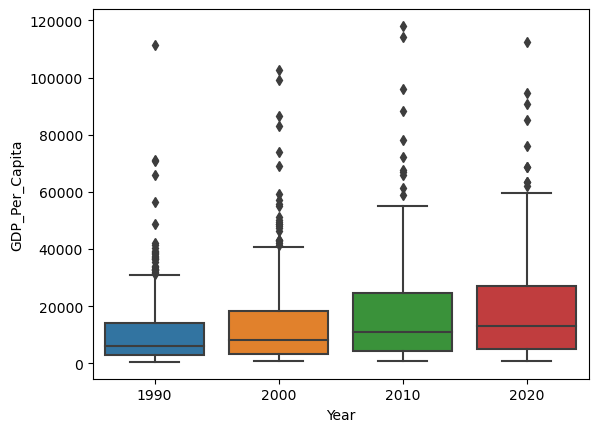

In [15]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

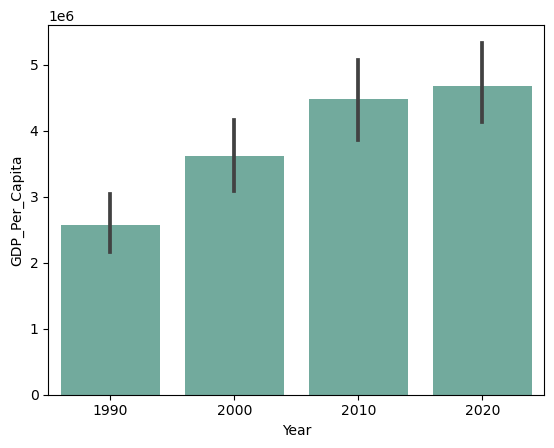

In [16]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum,  
    color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

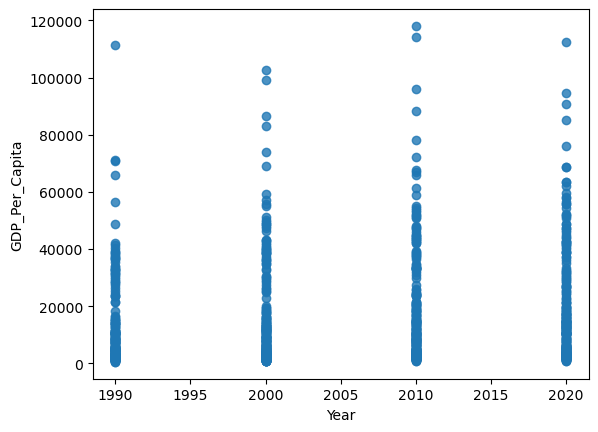

In [17]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg = False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

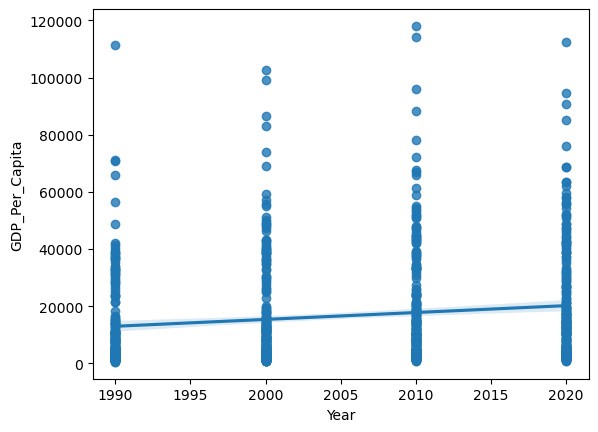

In [18]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

11. Which country was the first to have a GDP per capita greater than $100,000?
    - United Arab Emirates in 1990

In [19]:
gdp_over_100K = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values(by='Year')
print(gdp_over_100K.head())

                   Country  Year  GDP_Per_Capita
6838  United Arab Emirates  1990   111454.055665
6837  United Arab Emirates  1991   106103.552655
6836  United Arab Emirates  1992   103470.924576
6834  United Arab Emirates  1994   100213.156226
6833  United Arab Emirates  1995   101570.992100


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [20]:
max_GDP_Per_Capita_2020 = gdp_df.loc[gdp_df['Year'] == 2020,'GDP_Per_Capita'].max()

country_max_GDP_2020 = gdp_df.loc[gdp_df['GDP_Per_Capita']== max_GDP_Per_Capita_2020, 'Country']
print(country_max_GDP_2020, max_GDP_Per_Capita_2020)


max_gdp2 = gdp_df.groupby(['Year','Country'])['GDP_Per_Capita'].max()
print(max_gdp2)

3882    Luxembourg
Name: Country, dtype: object 112557.309471818
Year  Country                    
1990  Africa Eastern and Southern     3083.976800
      Africa Western and Central      2810.341129
      Albania                         4827.034551
      Algeria                         8746.340762
      Angola                          5758.950488
                                         ...     
2020  Vietnam                        10338.270543
      West Bank and Gaza              5402.538773
      World                          16269.969854
      Zambia                          3277.816510
      Zimbabwe                        2134.555461
Name: GDP_Per_Capita, Length: 7176, dtype: float64


         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472
3883  Luxembourg  2019   116518.276815
3884  Luxembourg  2018   115049.926079
3885  Luxembourg  2017   114985.842236
3886  Luxembourg  2016   116283.699681


<Axes: xlabel='Year'>

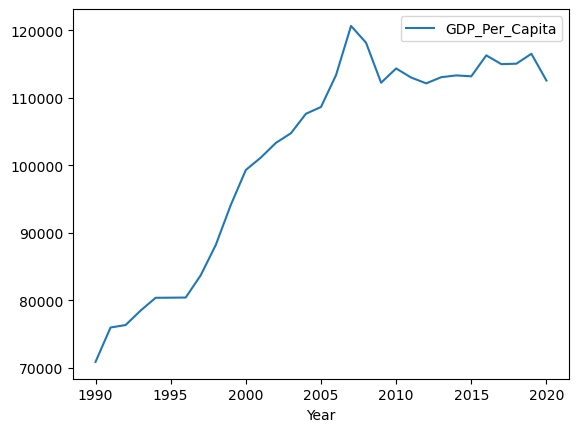

In [21]:
# creating easy to use df with Luxembourg's info
MaxGDPplt = gdp_df.loc[gdp_df['Country'] == "Luxembourg"]
print(MaxGDPplt.head())

MaxGDPplt.plot('Year', 'GDP_Per_Capita')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [22]:
#Country with lowest GDP per Capita in 2020
gdp2020 = gdp_df.loc[gdp_df['Year']== 2020]
min_gdp2020 = gdp2020.min()
print(min_gdp2020)


Country           Afghanistan
Year                     2020
GDP_Per_Capita     731.064074
dtype: object


<Axes: xlabel='Year'>

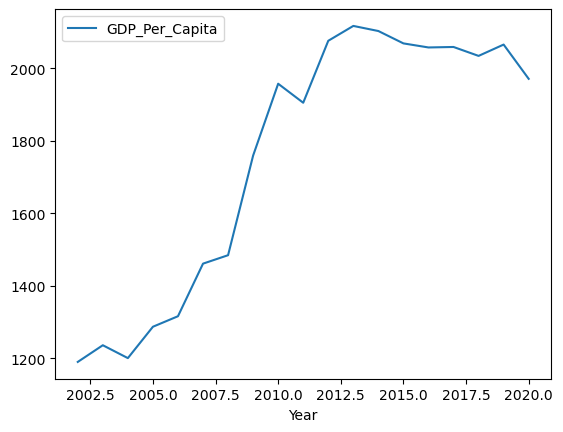

In [23]:
#Plotting graph of Afghanistan's (country with lowest gdp in 2020) GDP_Per_capita over time
Afg_GDP = gdp_df.loc[gdp_df['Country'] == "Afghanistan"]
Afg_GDP.plot('Year', 'GDP_Per_Capita')

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [24]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip', skipfooter = 180)
print(internet_df.head())
print(internet_df.tail())
internet_df.info()

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null

C:\Users\Aaron\AppData\Local\Temp\ipykernel_7948\4073562652.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip', skipfooter = 180)


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [25]:
internet_df.rename(columns={'Country or Area': 'Country'}, inplace=True)
internet_df.rename(columns={'Value': 'Internet_Users_Pct'}, inplace=True)
internet_df = internet_df[['Country', 'Year', 'Internet_Users_Pct']]
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [26]:
count_per_year = internet_df.groupby('Year')['Country'].count()
print(count_per_year)
#Large spikes of observations in 1990

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64


17. What is the first year to have a non-zero internet users percentage value?

In [27]:
#1991
non_zero = internet_df[internet_df['Internet_Users_Pct'] >= 1]
print(non_zero.sort_values(['Year']))

            Country  Year  Internet_Users_Pct
203       Australia  1991            1.097204
3848         Sweden  1991            1.160519
3039         Norway  1991            1.407395
3873    Switzerland  1991            1.179956
4300  United States  1991            1.163194
...             ...   ...                 ...
1536          Ghana  2014           18.900000
3323         Russia  2014           70.520000
1574         Greece  2014           63.210000
1449          Gabon  2014            9.810000
0       Afghanistan  2014            6.390000

[3039 rows x 3 columns]


18. How does the distribution of internet users percent differ for 2000 and 2014?

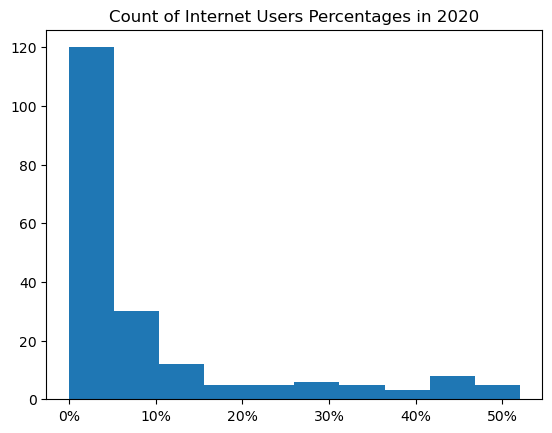

In [28]:
#Massive influx of internet users from 2000 - 2014. In 2000 about 145 countries had 20% or less internet users and no country had over 60% 
#of their population on the internet. Compared to 2014 where only 30 countries have 20% or less internet users, and almost 20 countries have over
#90% of their population as internet users.


int_pct_2000 = internet_df[internet_df['Year'] == 2000]
int_pct_2014 = internet_df[internet_df['Year'] == 2014]

plt.hist(int_pct_2000['Internet_Users_Pct'])
plt.title('Count of Internet Users Percentages in 2020')
plt.xticks([0,10,20,30,40,50], ['0%','10%','20%','30%','40%','50%'])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(internet_2000['Internet_Users_Pct'], bins=20)
ax[0].set_title('Distribution of Internet Users Percent in 2000')
ax[0].set_xlabel('Internet Users Percent')
ax[0].set_ylabel('Count')
ax[1].hist(internet_2014['Internet_Users_Pct'], bins=20)
ax[1].set_title('Distribution of Internet Users Percent in 2014')
ax[1].set_xlabel('Internet Users Percent')
ax[1].set_ylabel('Count')
plt.show()

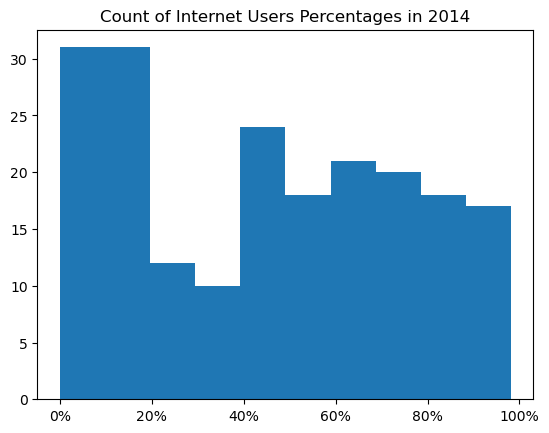

In [29]:
plt.hist(int_pct_2014['Internet_Users_Pct'])
plt.title('Count of Internet Users Percentages in 2014')
plt.xticks([0,20,40,60, 80, 100], ['0%','20%','40%','60%', '80%', '100%'])
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [30]:
#16
count_below_5 = int_pct_2014[int_pct_2014['Internet_Users_Pct'] < 5.00].count()
print(count_below_5)

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [56]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country','Year'], how = 'outer')
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2020     1970.560169                 NaN
1  Afghanistan  2019     2065.036235                 NaN
2  Afghanistan  2018     2033.804389                 NaN
3  Afghanistan  2017     2058.400221                 NaN
4  Afghanistan  2016     2057.067978                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8251   Yemen  1999             NaN            0.056629
8252   Yemen  1998             NaN            0.023323
8253   Yemen  1997             NaN            0.015025
8254   Yemen  1996             NaN            0.000621
8255   Yemen  1990             NaN            0.000000


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [57]:
#Countries with hightest internet user percentage in 2014: Iceland, Bermuda, Norway
year_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
top_3_2014 = year_2014.nlargest(3, 'Internet_Users_Pct')
print(top_3_2014)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803  Iceland  2014    50450.741612               98.16
645   Bermuda  2014    77361.104881               96.80
4880   Norway  2014    62390.130313               96.30


In [66]:
#Each countries gdp took a drop around 2008 (maybe from the 2008 represssion). Iceland was most significantly affected.
top_3_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway'])]
print(top_3_countries.head())
#g = sns.FacetGrid(top_3_countries,  row="Country")
#g.map(sns.scatterplot, "Year", "GDP_Per_Capita")

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
639  Bermuda  2020    76105.138057                 NaN
640  Bermuda  2019    81681.726668                 NaN
641  Bermuda  2018    81423.408453                 NaN
642  Bermuda  2017    81834.955874                 NaN
643  Bermuda  2016    78149.352535                 NaN


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [64]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                     Afghanistan  2014     2102.384604                6.39
25    Africa Eastern and Southern  2014     3677.319414                 NaN
56     Africa Western and Central  2014     4215.646000                 NaN
87                        Albania  2014    11586.833878               60.10
118                       Algeria  2014    11512.690472               18.09
...                           ...   ...             ...                 ...
8147                       Turkey  2014             NaN               51.04
8170                    Venezuela  2014             NaN               57.00
8194                     Viet Nam  2014             NaN               48.31
8214        Virgin Islands (U.S.)  2014             NaN               50.07
8236                        Yemen  2014             NaN               22.55

[281 rows x 4 columns]


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

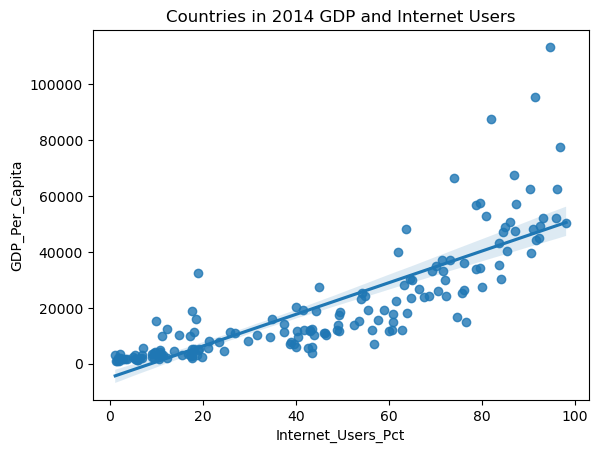

In [69]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"])
plt.title('Countries in 2014 GDP and Internet Users')
plt.show()

In [74]:
#China doesn't actually have internet user data for 2014 so should be excluded. 
top_4_gdp = gdp_and_internet_use_2014.nlargest(4, 'GDP_Per_Capita')
print(top_4_gdp)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3919  Macao SAR, China  2014   155201.740571                 NaN
3888        Luxembourg  2014   113313.578898               94.67
5387             Qatar  2014    95578.261511               91.49
5726         Singapore  2014    87616.637527               82.00


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [83]:
gdp_per_capita_2014 = year_2014
gdp_per_capita_2014['GDP_level'] = pd.qcut(year_2014['GDP_Per_Capita'], q=3, labels=['low', 'medium', 'high'])
print(gdp_per_capita_2014)


                          Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                     Afghanistan  2014     2102.384604                6.39   
25    Africa Eastern and Southern  2014     3677.319414                 NaN   
56     Africa Western and Central  2014     4215.646000                 NaN   
87                        Albania  2014    11586.833878               60.10   
118                       Algeria  2014    11512.690472               18.09   
...                           ...   ...             ...                 ...   
8147                       Turkey  2014             NaN               51.04   
8170                    Venezuela  2014             NaN               57.00   
8194                     Viet Nam  2014             NaN               48.31   
8214        Virgin Islands (U.S.)  2014             NaN               50.07   
8236                        Yemen  2014             NaN               22.55   

     bin_labels GDP_level  
6           low       l

C:\Users\Aaron\AppData\Local\Temp\ipykernel_7948\2581673209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita_2014['GDP_level'] = pd.qcut(year_2014['GDP_Per_Capita'], q=3, labels=['low', 'medium', 'high'])
